### This jupyter notebook contains all information of data analysis process of the dataset(Airline company)

### ***Author : Umidjon Sattorov student at Mohirdev platform***

In [1]:
#Importing all necessary libraries and modules
#Data processing
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Preprocessing and feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Modelling
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

#Metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

Structure of the dataset available : 

1) id - unique identifier column(as index)
2) Gender - gender of airline service customer
3) Customer Type - the type of the customer of airline company(Whether the customer is loyal or disloyal)
4) Age - age of the customer
5) Type of Travel - the purpose of of the travel
6) Flight Distance - distance of the flight in miles
7) Inflight wifi service - satisfaction of the customer from wifi system of ailine company(1 - 5)
8) Departure/Arrival time convenient - satisfaction level of customer from departure and arrival time
9) Ease of Online booking - satisfaction level of customer from online booking system of airline company
10) Gate location - satisfaction of the customer from gate location
11) Food and drink - satisfaction of the customer from culinary service
12) Online boarding -satisfaction of the customer from online boarding
13) Seat comfort - the satisfaction of the customer from the quality of the seating
14) Inflight entertainment - satisfaction of the customer from inflight entertainment system
15) On-Board service  - satisfaction of the customer from on-board service quality 
16) Leg room service - satisfaction of the customer from the leg room service quality
17) Baggage handling - the satisfaction of the customer from baggage handling service
18) Checkin service - the satisfaction of the customer from checkin service
19) Inflight service - the satisfaction of the customer from inflight service quality
20) Cleanliness - the satisfaction rate of the customer from cleanliness of airline company
21) Departure delay in Minutes - time delayed before departure
22) Arrival delay in Minutes - time delayed before arrival

23) ***satisfaction*** - satisfaction of the customer from the airline service(target column)(1 - satisfied, 0 - distisfied)

From the description of the column, it seems like almost every column has high correlation with our target column. This means, our job is gonna be pretty straightforward. Moreover the little number of categorical features doesn't cause any problems. Only the problem is empty values in one column.

In [2]:
#Reading dataset from csf formats
df = pd.read_csv(filepath_or_buffer = './data/train_dataset.csv', sep = ',', index_col = 'id')
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [3]:
#Reading data from the test dataset
df_test = pd.read_csv(filepath_or_buffer = './data/test_dataset.csv', sep = ',', index_col = 'id')
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0


In [5]:
#The size of the dataset
df.shape

(10000, 23)

In [25]:
#The size of the dataset
df_test.shape

(4000, 22)

The size of the dataset is not big and doesn't cause any serious problems with computational resources and time involved for training model.

In [7]:
#Checking the type of the columns and empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


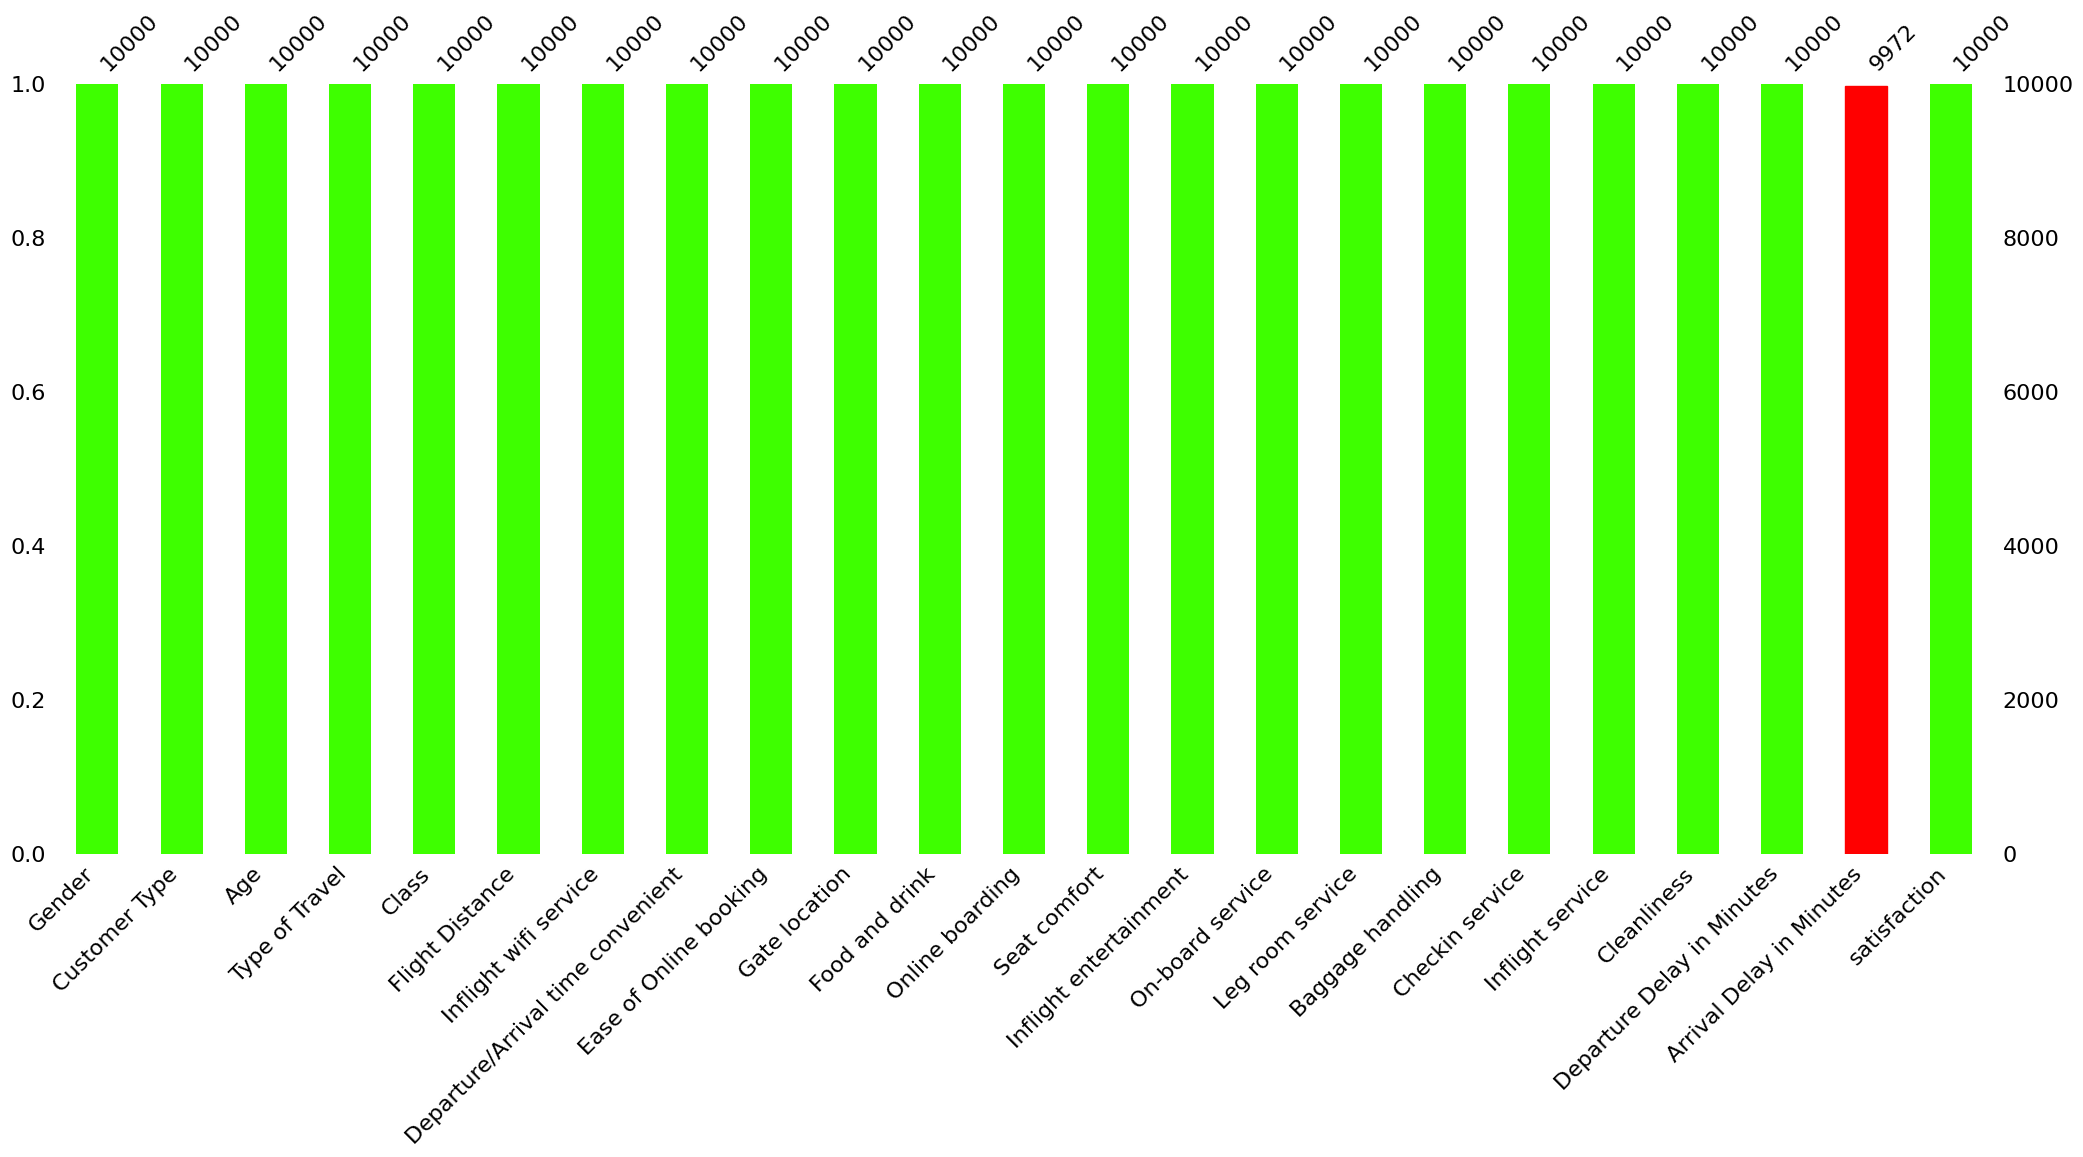

In [21]:
msno_bar = msno.bar(df = df, color = '#3EFF00')

bars = msno_bar.patches

for bar, value in zip(bars, df.isnull().sum()):
    if value > 0:
        bar.set_color('red')

plt.show()

From the graph above it seems like there is missing values in the 'Arrival Delay in Minutes' column. It may cause serious problem to our machine learning model, thus I am going fill up this empty values in the best way possible.

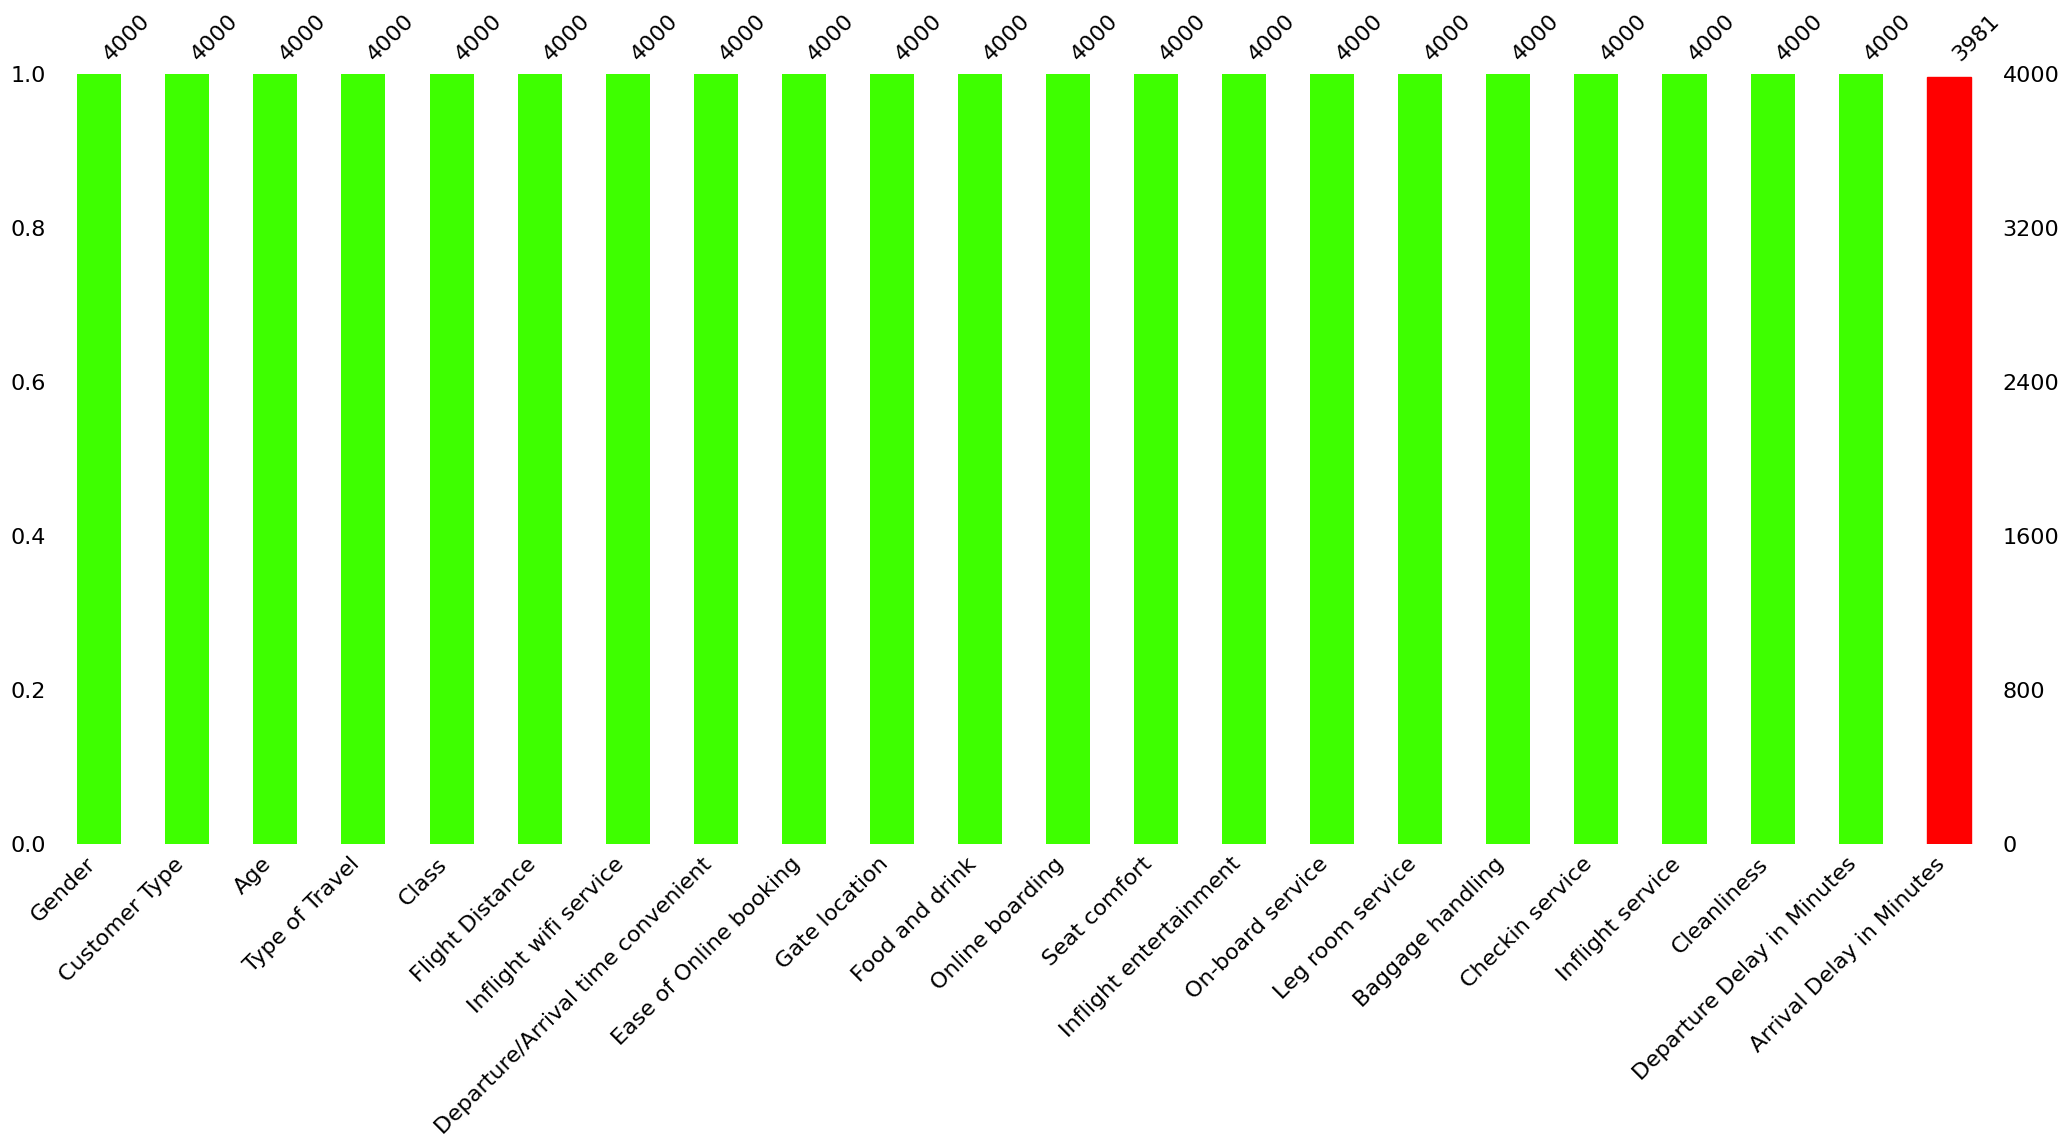

In [27]:
#Checking the existance of empty values for test dataset
msno_bar = msno.bar(df = df_test, color = '#3EFF00')

bars = msno_bar.patches

for bar, value in zip(bars, df_test.isnull().sum()):
    if value > 0:
        bar.set_color('red')

plt.show()

Again same column contain empty values in the test dataset

Other problem that mostly occur while training data in classification problems is class imbalance. This imbalance problem may lead to biased machine learning models. To avoid this, we might use weight assignment or oversampling techniques. But from the graph below, we can absolutely say that there is not problem with class imbalance in the dataset.

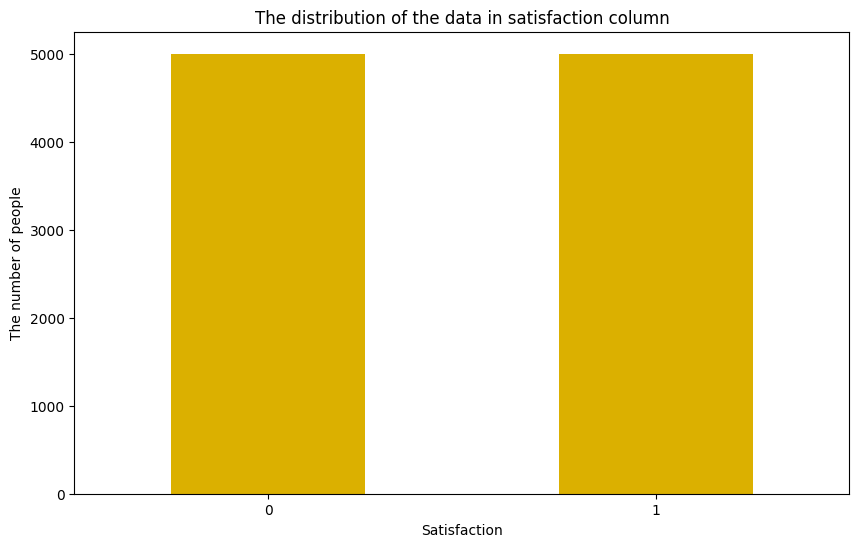

In [29]:
dist_satisfaction = df['satisfaction'].value_counts()

plt.figure(figsize=(10, 6))
dist_satisfaction.plot(kind='bar', color='#DBB000')
plt.title('The distribution of the data in satisfaction column')
plt.xlabel('Satisfaction')
plt.ylabel('The number of people')
plt.xticks(rotation=0)
plt.show()

Checking the distribution of the data for categorical features in order to see if we can infer some conclusions.

Distribution of the data in Gender column


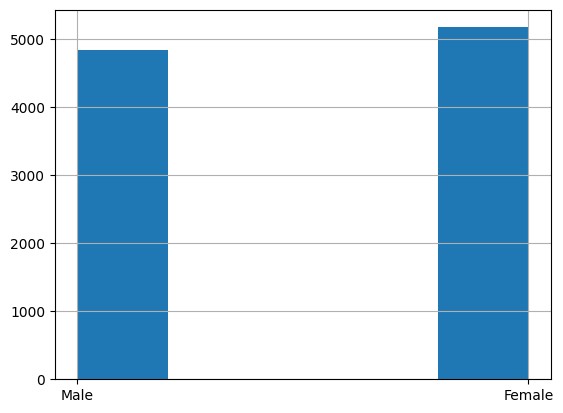

Distribution of the data in Customer Type column


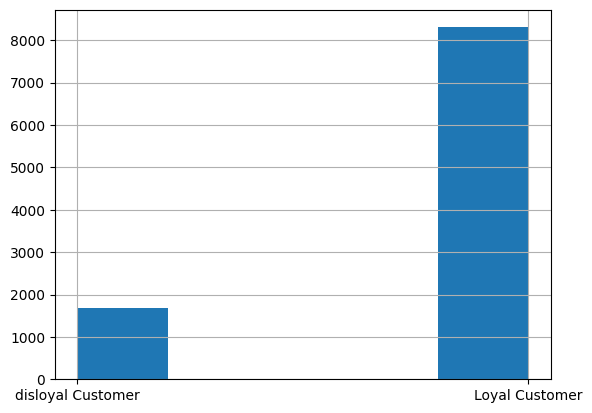

Distribution of the data in Type of Travel column


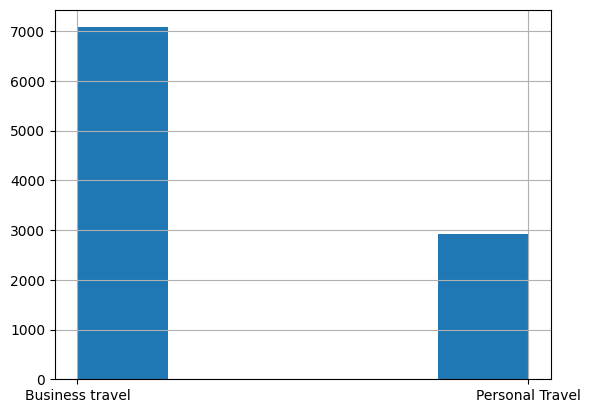

Distribution of the data in Class column


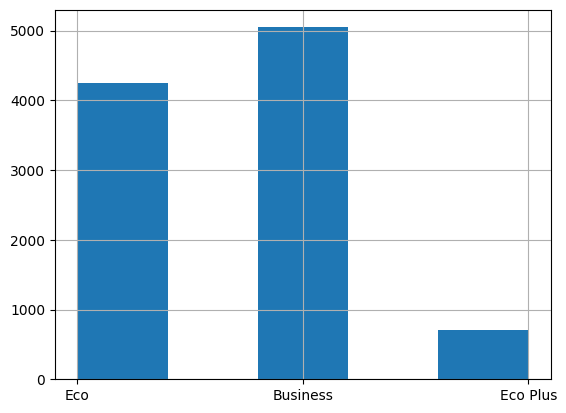

In [38]:
#Distribution of the data in categorical columns
cat_cols = df.select_dtypes(include = ['object']).columns
for col in cat_cols : 
    print(f'Distribution of the data in {col} column')
    df[col].hist(bins = 5)
    plt.show()

From the bar graphs above, we can say that most of the customers of airline service are females and loyal to their service. Moreover, we can that higher percentage of people traveled for business purpose, not for personal purpose. Another conclusion we can extract from this bar graphs is the choice of the travel class. Tremendous part of the customers choosed Business class for travel instead of eco or eco plus service(Maybe the customers are wealthier part of the society.)

I have little question here, is there any correlation between the gender of the people with their loyalty rate for airline company? 

Absoluty this can be seen in correlation matrix, but I have one more trick here to identify correlation.

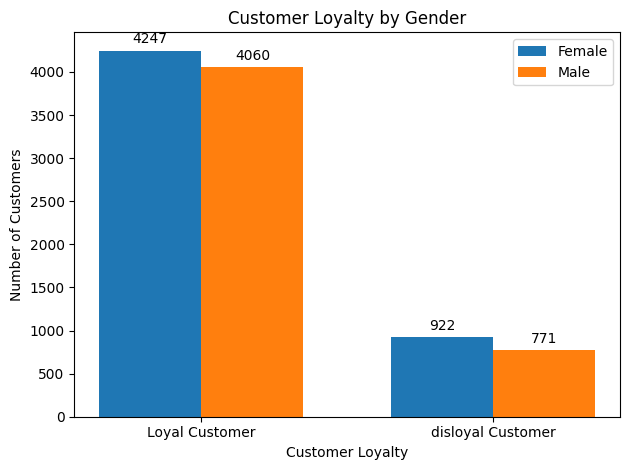

In [48]:
gen_type = df.groupby(['Gender', 'Customer Type']).size().unstack(fill_value=0)

labels = gen_type.columns.to_list()
female_counts = gen_type.loc['Female'].tolist()
male_count = gen_type.loc['Male'].tolist()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, female_counts, width, label = 'Female')
rects2 = ax.bar(x + width / 2, male_count, width, label = 'Male')

ax.set_xlabel('Customer Loyalty')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Loyalty by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Well, that is understandable. The loyalty of the customer isn't related the gender of the customer.

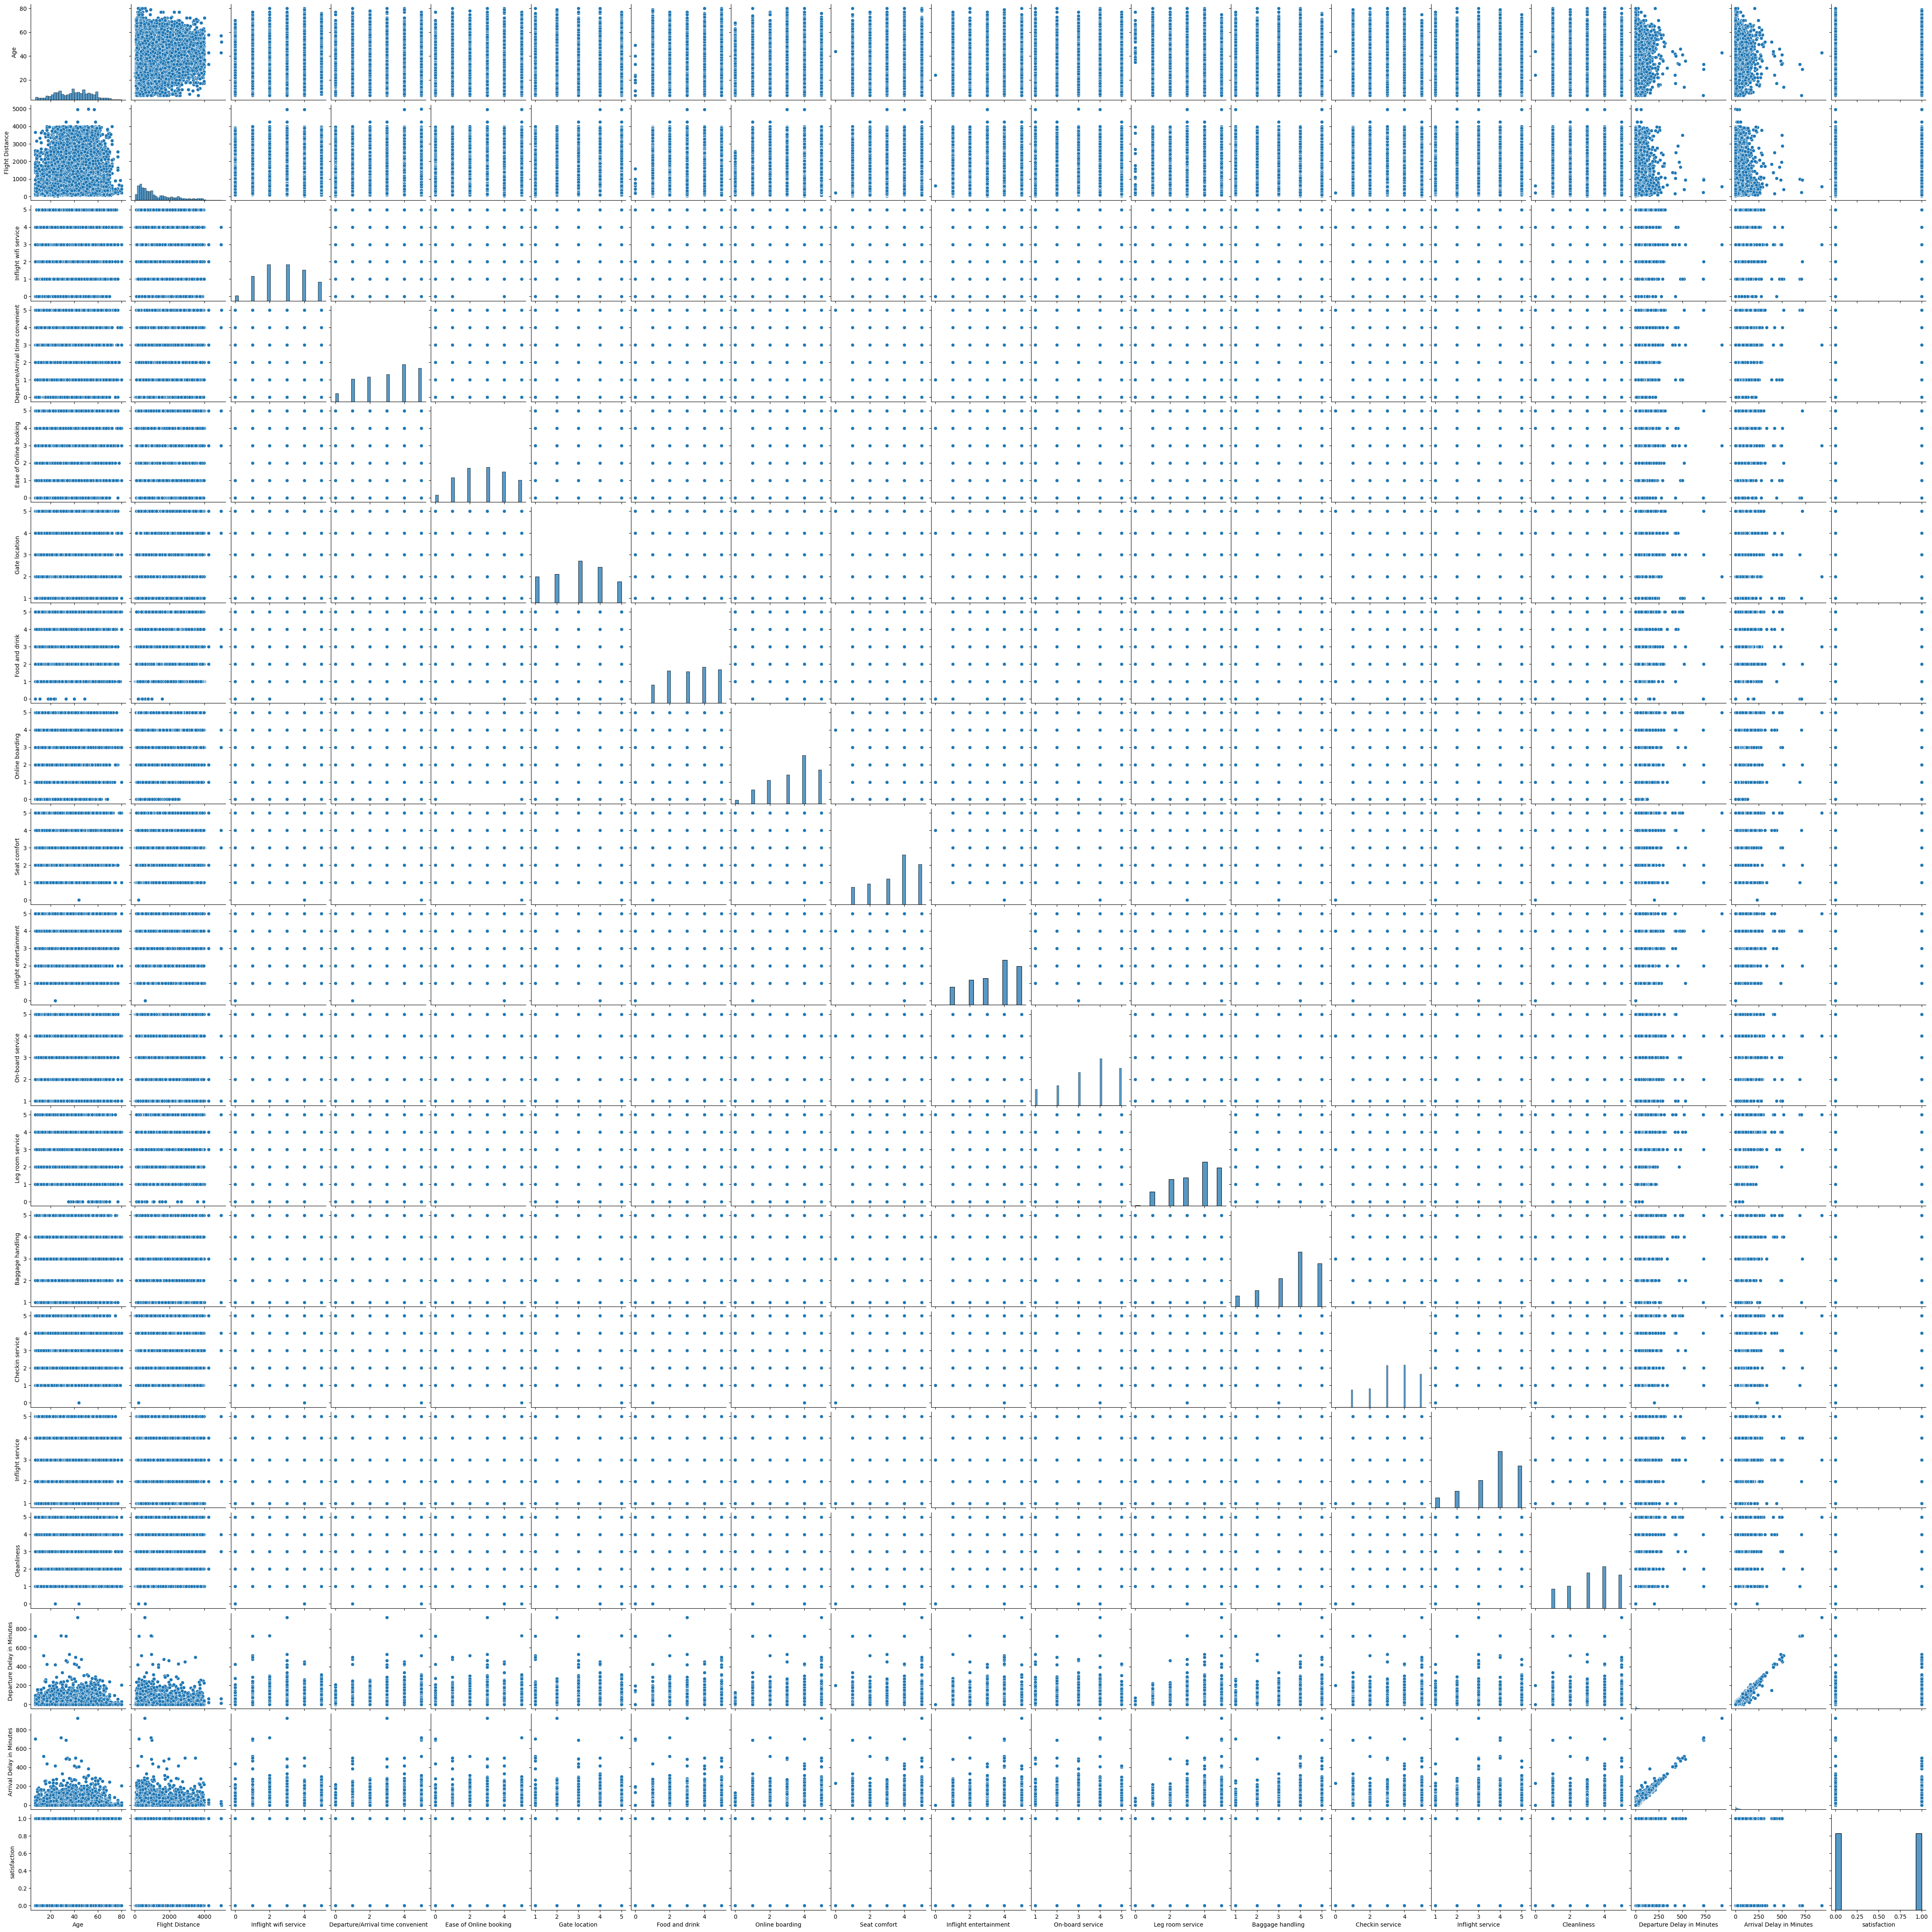

In [6]:
#Seeing the distribution and correlation of numerical features
sns.pairplot(data = df)
plt.show()

It seems like it is really challenging to extract some information from this graph, but at the bottom of the graph there is linear correlation between two features. Ok, I am going to see the distribution of the numerical features and demonstrate the features that have linear correlation with each other.

Distribution of the data in Age column


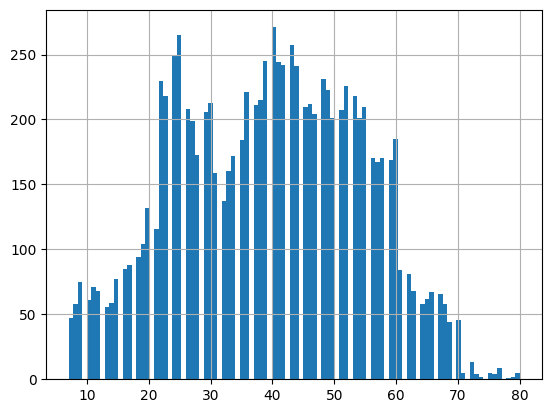

Distribution of the data in Flight Distance column


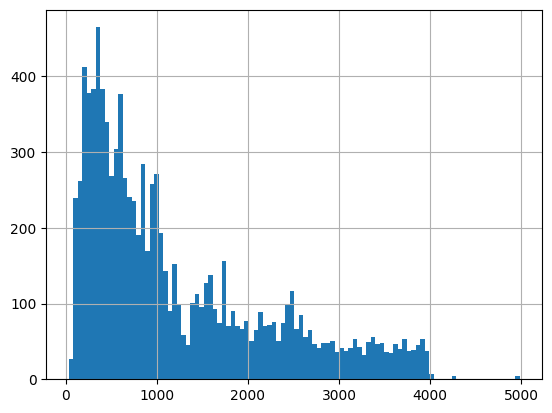

Distribution of the data in Inflight wifi service column


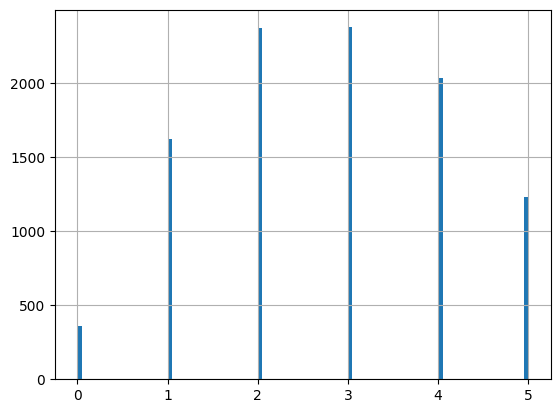

Distribution of the data in Departure/Arrival time convenient column


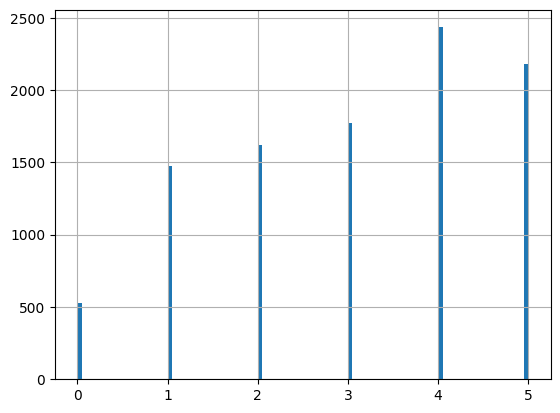

Distribution of the data in Ease of Online booking column


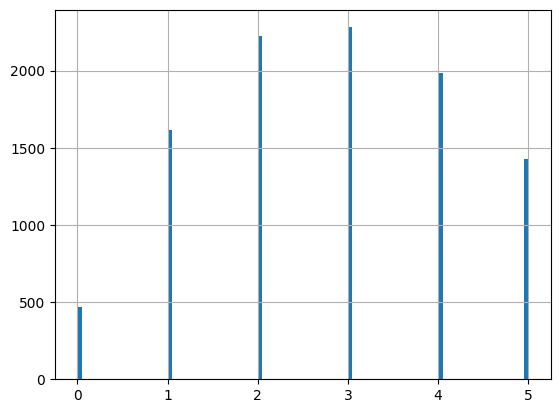

Distribution of the data in Gate location column


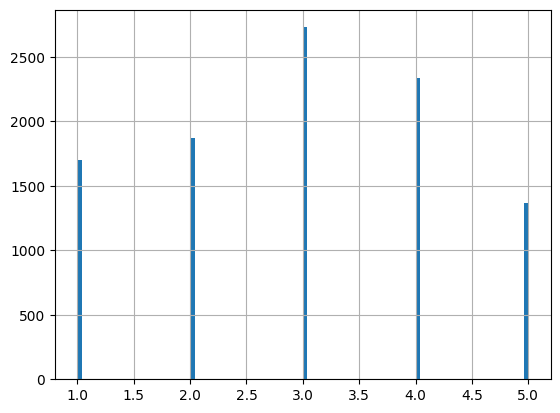

Distribution of the data in Food and drink column


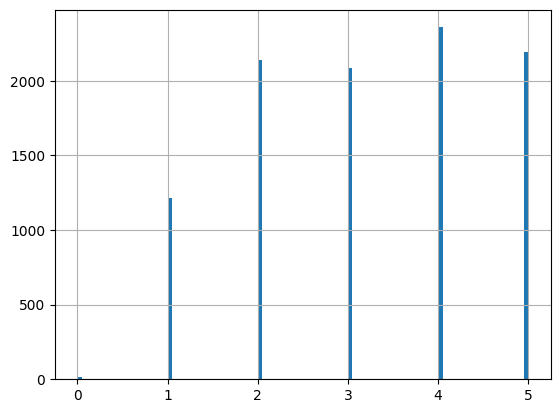

Distribution of the data in Online boarding column


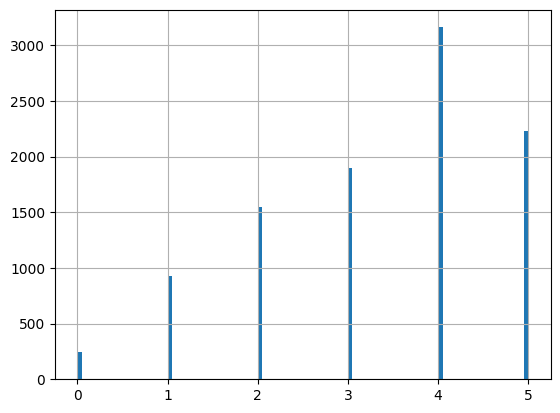

Distribution of the data in Seat comfort column


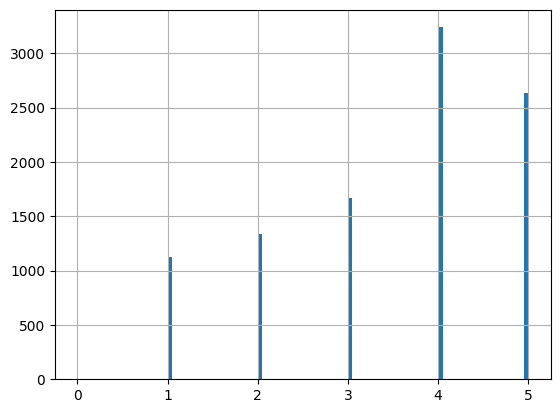

Distribution of the data in Inflight entertainment column


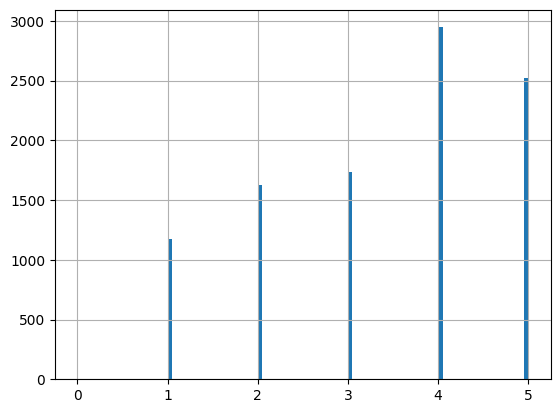

Distribution of the data in On-board service column


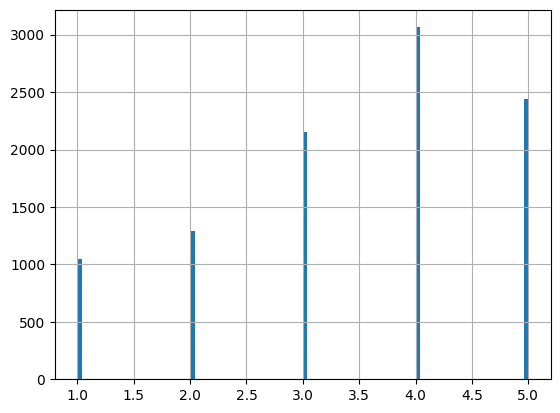

Distribution of the data in Leg room service column


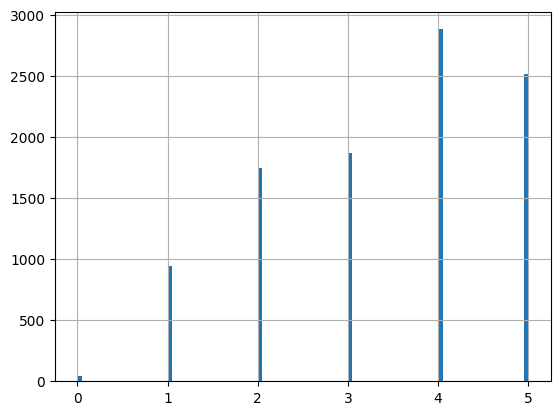

Distribution of the data in Baggage handling column


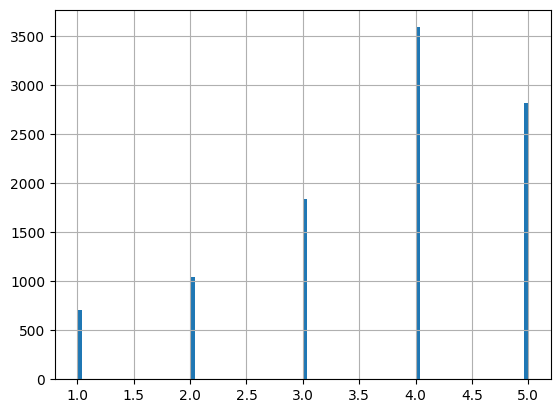

Distribution of the data in Checkin service column


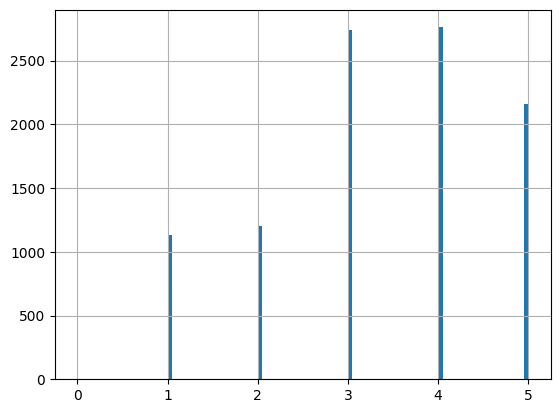

Distribution of the data in Inflight service column


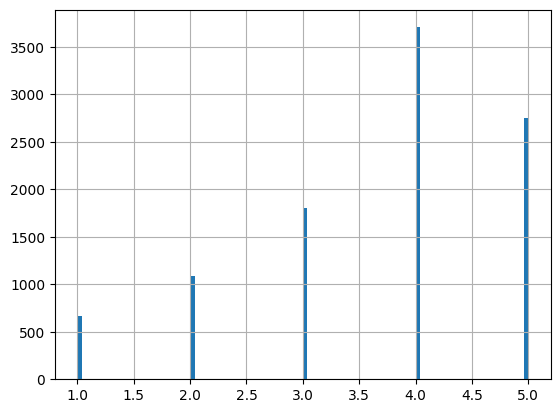

Distribution of the data in Cleanliness column


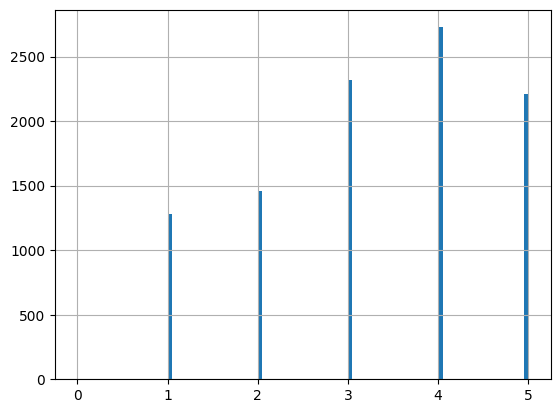

Distribution of the data in Departure Delay in Minutes column


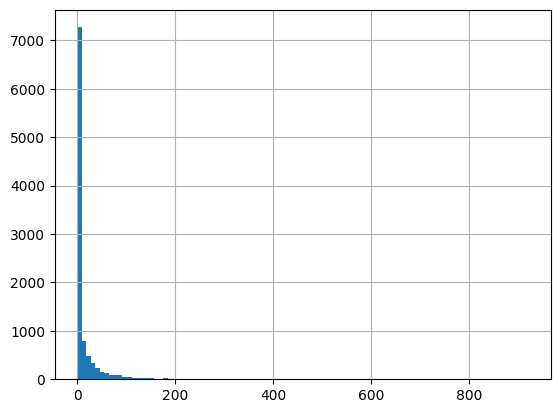

Distribution of the data in Arrival Delay in Minutes column


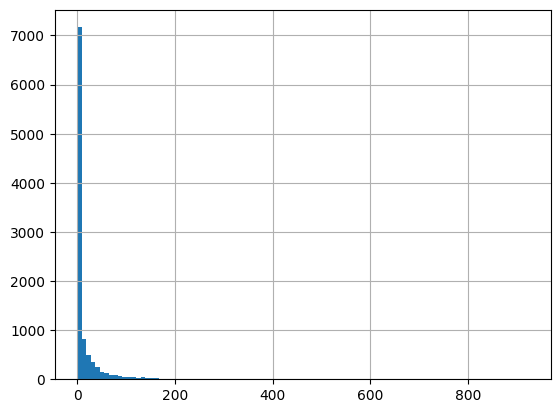

Distribution of the data in satisfaction column


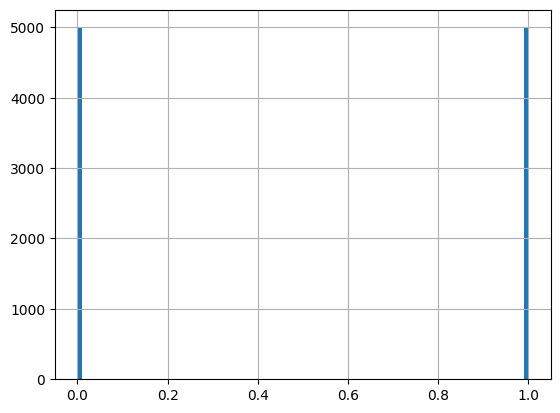

In [9]:
#Distribution of the data in nuerical columns columns
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
for col in num_cols : 
    print(f'Distribution of the data in {col} column')
    df[col].hist(bins = 100)
    plt.show()

From the graphs above, we can definately say that most people who used airline service were at their 20s and 40s in terms of their age(normal distribution). Morever we can claim from the second graph that company organized small distance flights more compared to long flights. If we look at the graphs which indicate the satisfaction of the customers of airline service, this company is rated around 3-4. But most people didn't satisfied with inflight wifi service, that is why they rated this service around 2-3. If we observe delay in departure and arrival time, we can see that company had flights with long departure and arrival delays, but that is not problem.

One question always make me interested, how much females and males are attentive to cleanliness service?

In [21]:
clean_score_gender = df.groupby(by = 'Gender')['Cleanliness'].mean()
clean_score_gender

Gender
Female    3.321919
Male      3.299524
Name: Cleanliness, dtype: float64

**As expected**

In [23]:
#Correlation between arrival delay and departure delay
df['Arrival Delay in Minutes'].corr(df['Departure Delay in Minutes'])

0.9680951576656999

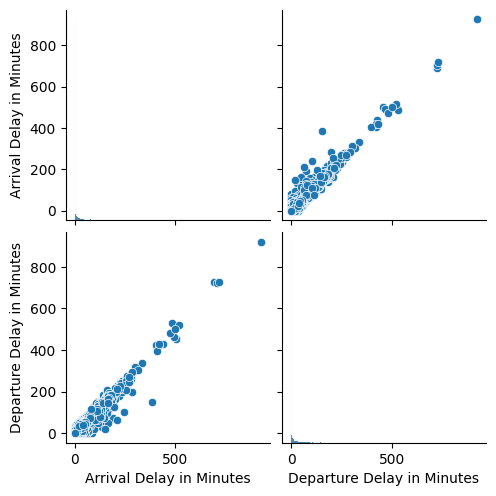

In [25]:
sns.pairplot(data = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']])
plt.show()

It seems like I found the way to fill up missing values in the column Arrival Delay in Minutes. They have linear correlation ship with each other. That imply the possibility of making Linear regression model which can help us to fill up missing value according to the column Departure Delay in Minutes.

### Feature engineering

Filling missing values with linear regression model.

In [4]:
#Teaching Lineaar regression model with two related features
data = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].dropna()
data.shape

(9972, 2)

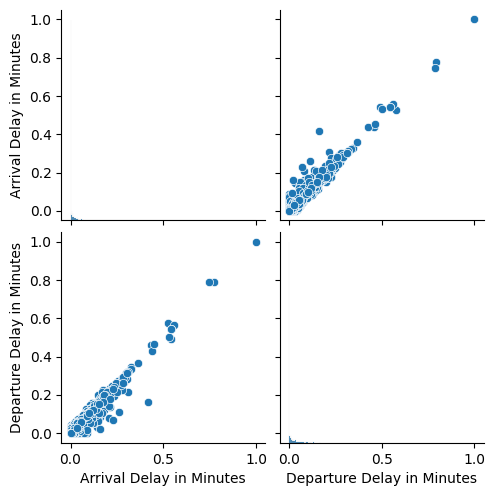

In [5]:
train_data, test_data = train_test_split(data, test_size = 0.2)

min_max = MinMaxScaler()
train_data = pd.DataFrame(min_max.fit_transform(X = train_data), columns = train_data.columns)
test_data = pd.DataFrame(min_max.transform(X = test_data), columns = test_data.columns)

x_train, y_train = train_data[['Departure Delay in Minutes']], train_data['Arrival Delay in Minutes']
x_test, y_test = test_data[['Departure Delay in Minutes']], test_data['Arrival Delay in Minutes']
sns.pairplot(data = train_data)
plt.show()

In [84]:
#Using theil_sen regressor algorithm 
theil_sen_optimal = TheilSenRegressor(random_state = 1, fit_intercept = True, max_iter = 1000).fit(x_train, y_train)

pred_train_theil = theil_sen_optimal.predict(x_train)
pred_test_theil = theil_sen_optimal.predict(x_test)

print(f"Mean absolute error of Theil-Sen regression in train dataset is {mean_absolute_error(y_true = y_train, y_pred = pred_train_theil)}")
print(f"Mean absolute error of Theil-Sen regression in test dataset is {mean_absolute_error(y_true = y_test, y_pred = pred_test_theil)}")
print(f"Mean squared error of Theil-Sen regression in train dataset is {mean_squared_error(y_true = y_train, y_pred = pred_train_theil)}")
print(f"Mean squared error of Theil-Sen regression in test dataset is {mean_squared_error(y_true = y_test, y_pred = pred_test_theil)}")
print(f"R2 score of Theil-Sen regression in train dataset is {r2_score(y_true = y_train, y_pred = pred_train_theil)}")
print(f"R2 score of Theil-Sen regression in test dataset is {r2_score(y_true = y_test, y_pred = pred_test_theil)}")

Mean absolute error of Theil-Sen regression in train dataset is 0.015834338712363057
Mean absolute error of Theil-Sen regression in test dataset is 0.015345901874776125
Mean squared error of Theil-Sen regression in train dataset is 0.0020198419822085637
Mean squared error of Theil-Sen regression in test dataset is 0.0017035892496029483
R2 score of Theil-Sen regression in train dataset is -0.03930459016195331
R2 score of Theil-Sen regression in test dataset is -0.05354912430049441


In [6]:
#Using LinearRegressor algorithm 
lr = LinearRegression(fit_intercept = True).fit(x_train, y_train)

pred_train_lr = lr.predict(x_train)
pred_test_lr = lr.predict(x_test)

print(f"Mean absolute error of Linear regression in train dataset is {mean_absolute_error(y_true = y_train, y_pred = pred_train_lr)}")
print(f"Mean absolute error of Linear regression in test dataset is {mean_absolute_error(y_true = y_test, y_pred = pred_test_lr)}")
print(f"Mean squared error of Linear regression in train dataset is {mean_squared_error(y_true = y_train, y_pred = pred_train_lr)}")
print(f"Mean squared error of Linear regression in test dataset is {mean_squared_error(y_true = y_test, y_pred = pred_test_lr)}")
print(f"R2 score of Linear regression in train dataset is {r2_score(y_true = y_train, y_pred = pred_train_lr)}")
print(f"R2 score of Linear regression in test dataset is {r2_score(y_true = y_test, y_pred = pred_test_lr)}")

Mean absolute error of Linear regression in train dataset is 0.005501702388021302
Mean absolute error of Linear regression in test dataset is 0.005610057292225086
Mean squared error of Linear regression in train dataset is 0.00011821738751491905
Mean squared error of Linear regression in test dataset is 0.00011680617625646653
R2 score of Linear regression in train dataset is 0.934349363353137
R2 score of Linear regression in test dataset is 0.9466143856951442


In [7]:
#Using Random Forest Regressor algorithm 
rm = RandomForestRegressor(n_estimators = 1000, random_state = 1).fit(x_train, y_train)

pred_train_rm = rm.predict(x_train)
pred_test_rm = rm.predict(x_test)

print(f"Mean absolute error of Random Forests regression in train dataset is {mean_absolute_error(y_true = y_train, y_pred = pred_train_rm)}")
print(f"Mean absolute error of Random Forests regression in test dataset is {mean_absolute_error(y_true = y_test, y_pred = pred_test_rm)}")
print(f"Mean squared error of Random Forests regression in train dataset is {mean_squared_error(y_true = y_train, y_pred = pred_train_rm)}")
print(f"Mean squared error of Random Forests regression in test dataset is {mean_squared_error(y_true = y_test, y_pred = pred_test_rm)}")
print(f"R2 score of Random Forests regression in train dataset is {r2_score(y_true = y_train, y_pred = pred_train_rm)}")
print(f"R2 score of Random Forests regression in test dataset is {r2_score(y_true = y_test, y_pred = pred_test_rm)}")

Mean absolute error of Random Forests regression in train dataset is 0.0055870623307181675
Mean absolute error of Random Forests regression in test dataset is 0.0060600924821112715
Mean squared error of Random Forests regression in train dataset is 0.00010279490234962619
Mean squared error of Random Forests regression in test dataset is 0.00012346143372428164
R2 score of Random Forests regression in train dataset is 0.9429140592160912
R2 score of Random Forests regression in test dataset is 0.9435726372220482


In [11]:
#Using CatBoostRegressor algorithm
cb = CatBoostRegressor(iterations = 1000, random_seed = 1, verbose = 0).fit(x_train, y_train)

pred_train_cb = cb.predict(x_train)
pred_test_cb = cb.predict(x_test)

print(f"Mean absolute error of CatBoost regression in train dataset is {mean_absolute_error(y_train, pred_train_cb)}")
print(f"Mean absolute error of CatBoost regression in test dataset is {mean_absolute_error(y_test, pred_test_cb)}")
print(f"Mean squared error of CatBoost regression in train dataset is {mean_squared_error(y_train, pred_train_cb)}")
print(f"Mean squared error of CatBoost regression in test dataset is {mean_squared_error(y_test, pred_test_cb)}")
print(f"R2 score of CatBoost regression in train dataset is {r2_score(y_train, pred_train_cb)}")
print(f"R2 score of CatBoost regression in test dataset is {r2_score(y_test, pred_test_cb)}")


Mean absolute error of CatBoost regression in train dataset is 0.005585545634449716
Mean absolute error of CatBoost regression in test dataset is 0.005933005870926514
Mean squared error of CatBoost regression in train dataset is 0.0001029057693128953
Mean squared error of CatBoost regression in test dataset is 0.00011517216264918034
R2 score of CatBoost regression in train dataset is 0.9428524905511535
R2 score of CatBoost regression in test dataset is 0.9473612025416775


In [88]:
#Using Polynomial Regression
poly_features = PolynomialFeatures(degree = 4, include_bias = False)
x_train_poly = poly_features.fit_transform(X = x_train)
x_test_poly = poly_features.transform(X = x_test)

lr_poly = LinearRegression(fit_intercept = True).fit(x_train_poly, y_train)

pred_train_lr_poly = lr_poly.predict(x_train_poly)
pred_test_lr_poly = lr_poly.predict(x_test_poly)

print(f"Mean absolute error of Polynomial regression in train dataset is {mean_absolute_error(y_true = y_train, y_pred = pred_train_lr_poly)}")
print(f"Mean absolute error of Polynomial regression in test dataset is {mean_absolute_error(y_true = y_test, y_pred = pred_test_lr_poly)}")
print(f"Mean squared error of Polynomial regression in train dataset is {mean_squared_error(y_true = y_train, y_pred = pred_train_lr_poly)}")
print(f"Mean squared error of Polynomial regression in test dataset is {mean_squared_error(y_true = y_test, y_pred = pred_test_lr_poly)}")
print(f"R2 score of Polynomial regression in train dataset is {r2_score(y_true = y_train, y_pred = pred_train_lr_poly)}")
print(f"R2 score of Polynomial regression in test dataset is {r2_score(y_true = y_test, y_pred = pred_test_lr_poly)}")

Mean absolute error of Polynomial regression in train dataset is 0.005694135137339036
Mean absolute error of Polynomial regression in test dataset is 0.0055107749155902976
Mean squared error of Polynomial regression in train dataset is 0.00011120658124892957
Mean squared error of Polynomial regression in test dataset is 0.00013679561198790298
R2 score of Polynomial regression in train dataset is 0.9427789345076122
R2 score of Polynomial regression in test dataset is 0.9154016161750285


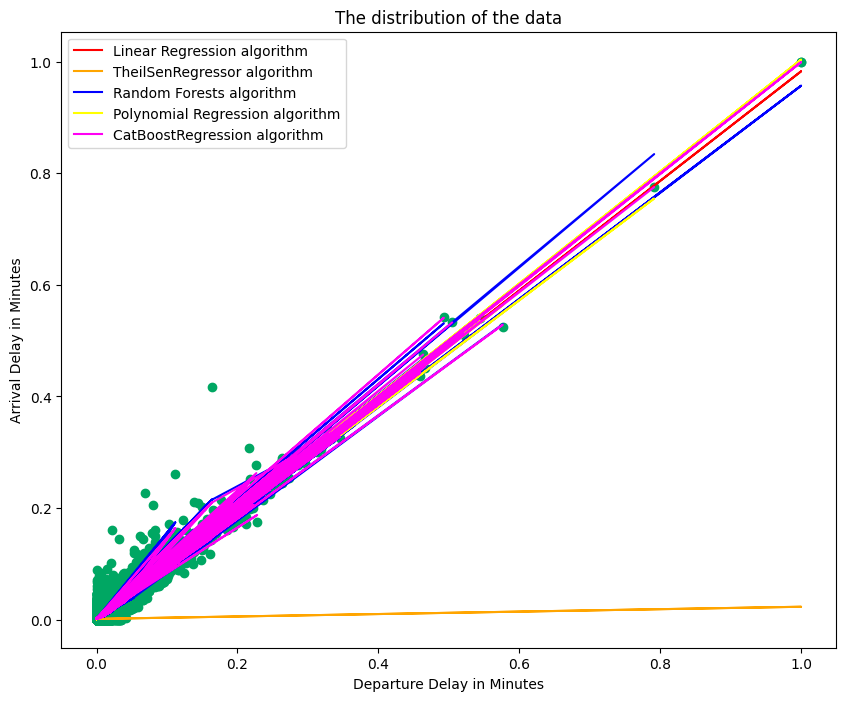

In [49]:
#Seeing the performance of four regression models in the both training and test datasets
plt.figure(figsize = (10, 8))
plt.scatter(x = x_train, y = y_train, c = '#00A763')
plt.plot(x_train, pred_train_lr, color='red', label = 'Linear Regression algorithm')
plt.plot(x_train, pred_train_theil, color='orange', label = 'TheilSenRegressor algorithm')
plt.plot(x_train, pred_train_rm, color='blue', label = 'Random Forests algorithm')
plt.plot(x_train, pred_train_lr_poly, color='yellow', label = 'Polynomial Regression algorithm')
plt.plot(x_train, pred_train_cb, color='#FF00F3', label = 'CatBoostRegression algorithm')
plt.title(label = 'The distribution of the data')
plt.xlabel(xlabel = 'Departure Delay in Minutes')
plt.ylabel(ylabel = 'Arrival Delay in Minutes')
plt.legend()
plt.show()

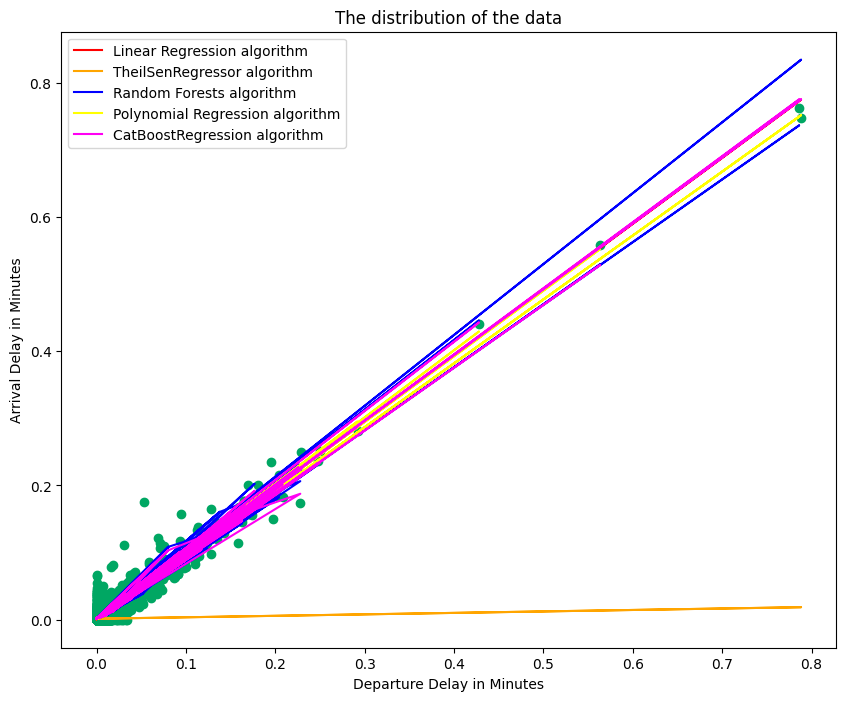

In [56]:
#Seeing the performance of four regression models in the both training and test datasets
plt.figure(figsize = (10, 8))
plt.scatter(x = x_test, y = y_test, c = '#00A763')
plt.plot(x_test, pred_test_lr, color='red', label = 'Linear Regression algorithm')
plt.plot(x_test, pred_test_theil, color='orange', label = 'TheilSenRegressor algorithm')
plt.plot(x_test, pred_test_rm, color='blue', label = 'Random Forests algorithm')
plt.plot(x_test, pred_test_lr_poly, color='yellow', label = 'Polynomial Regression algorithm')
plt.plot(x_test, pred_test_cb, color='#FF00F3', label = 'CatBoostRegression algorithm')
plt.title(label = 'The distribution of the data')
plt.xlabel(xlabel = 'Departure Delay in Minutes')
plt.ylabel(ylabel = 'Arrival Delay in Minutes')
plt.legend()
plt.show()

From the graph above, it seems like CatBoostRegressor algorithm performed well when it comes to predict "Arrival Delay in Minutes" according to the column named "Departure Delay in Minutes". So I am going to use this algorithm to fill up missing values in the column "Arrival Delay in Minutes".

In [9]:
missing_arrival_delays = df[df['Arrival Delay in Minutes'].isna()][['Arrival Delay in Minutes', 'Departure Delay in Minutes']]
missing_arrival_delays

,Arrival Delay in Minutes,Departure Delay in Minutes
id,,
143,NaN,175
278,NaN,0
282,NaN,110
428,NaN,0
478,NaN,5
482,NaN,22
532,NaN,64
1515,NaN,42
2088,NaN,60


In [12]:
missing_arrival_delays_scaled = min_max.transform(missing_arrival_delays)
dict_scaled = {
    'Departure Delay in Minutes' : [x[1] for x in missing_arrival_delays_scaled ]
}
df_scaled_missing = pd.DataFrame(data = dict_scaled)
predicted_arrival_delays = cb.predict(df_scaled_missing)
dict_scaled['Arrival Delay in Minutes'] = predicted_arrival_delays
df_scaled_missing = pd.DataFrame(data = dict_scaled)
true_value = min_max.inverse_transform(X = df_scaled_missing)

dept_delay = [x[0] for x in true_value]
arr_delay = [x[1] for x in true_value]
final_imputed_data = {
    'id' : missing_arrival_delays.index,
    'Departure Delay in Minutes' : dept_delay,
    'Arrival Delay in Minutes' : arr_delay
}
impute_data = pd.DataFrame(data = final_imputed_data)

df.loc[impute_data['id'], 'Arrival Delay in Minutes'] = impute_data['Arrival Delay in Minutes'].values.round().astype('int64').tolist()
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [13]:
missing_arrival_delays_test = df_test[df_test['Arrival Delay in Minutes'].isna()][['Arrival Delay in Minutes', 'Departure Delay in Minutes']]
missing_arrival_delays_test

,Arrival Delay in Minutes,Departure Delay in Minutes
id,,
43,NaN,42
394,NaN,7
458,NaN,14
488,NaN,42
564,NaN,106
724,NaN,7
851,NaN,0
858,NaN,1
1626,NaN,106


In [14]:
missing_arrival_delays_scaled_test = min_max.transform(missing_arrival_delays_test)
dict_scaled_test = {
    'Departure Delay in Minutes' : [x[1] for x in missing_arrival_delays_scaled_test]
}
df_scaled_missing_test = pd.DataFrame(data = dict_scaled_test)
predicted_arrival_delays_test = cb.predict(df_scaled_missing_test)
dict_scaled_test['Arrival Delay in Minutes'] = predicted_arrival_delays_test
df_scaled_missing_test = pd.DataFrame(data = dict_scaled_test)
true_value_test = min_max.inverse_transform(X = df_scaled_missing_test)

dept_delay_test = [x[0] for x in true_value_test]
arr_delay_test = [x[1] for x in true_value_test]
final_imputed_data_test = {
    'id' : missing_arrival_delays_test.index,
    'Departure Delay in Minutes' : dept_delay_test,
    'Arrival Delay in Minutes' : arr_delay_test
}
impute_data_test = pd.DataFrame(data = final_imputed_data_test)

df_test.loc[impute_data_test['id'], 'Arrival Delay in Minutes'] = impute_data_test['Arrival Delay in Minutes'].values.round().astype('int64').tolist()
df_test.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [93]:
#Saving imputed dataset into csv format 
df.to_csv('./data/imputed_train_dataset.csv', sep = ',')
df_test.to_csv('./data/imputed_test_dataset.csv', sep = ',')
print("Both fully imputed dataset are preserved into data folder")

Both fully imputed dataset are preserved into data folder


Converting categorical features into numerical o type by encoding various techniques.

In [89]:
#Reading imputed data
df = pd.read_csv('./data/imputed_train_dataset.csv', sep = ',')
df_test = pd.read_csv('./data/imputed_test_dataset.csv', sep = ',')

In [72]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


Because three categorical features of the dataset can be binary encoded, I am going encode these features with binary numbers.

In [90]:
#Encoding binary features with binary numbers
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'Male' else 0)
df_test['Gender'] = df_test['Gender'].apply(lambda x : 1 if x == 'Male' else 0)

df['Customer Type'] = df['Customer Type'].apply(lambda x : 1 if x == 'Loyal Customer' else 0)
df_test['Customer Type'] = df_test['Customer Type'].apply(lambda x : 1 if x == 'Loyal Customer' else 0)

df['Type of Travel'] = df['Type of Travel'].apply(lambda x : 1 if x == 'Business travel' else 0)
df_test['Type of Travel'] = df_test['Type of Travel'].apply(lambda x : 1 if x == 'Business travel' else 0)

#Calculating overall delay minutes
df['delay'] = df['Arrival Delay in Minutes'] + df['Departure Delay in Minutes']
df_test['delay'] = df_test['Arrival Delay in Minutes'] + df_test['Departure Delay in Minutes']
df.drop(columns = ['Arrival Delay in Minutes', 'Departure Delay in Minutes'], inplace = True)
df_test.drop(columns = ['Arrival Delay in Minutes', 'Departure Delay in Minutes'], inplace = True)

In terms of the last categorical feature 'Class', we can encode feature using Label Encoder or One Hot encoder. In my opinion both technique work well(because the higher numbers can indicate richness level of customer as Business class, Eco Plus and Eco class can determine whether the customer of the airline service is wealthy or not) and contribute the quality of classification model postively. That is why, I am going to use both technique to encode feature and save the ready dataset in csv format.

In [91]:
#OneHot encoding 
ohe_df = df.copy()
ohe_cols = ['Class']

ohe = OneHotEncoder(sparse_output = False)
ohe_data = ohe.fit_transform(df[ohe_cols])
ohe_df[ohe.get_feature_names_out()] = ohe_data
ohe_df.drop(columns = ohe_cols, inplace = True)
ohe_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,delay,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,0,33,1,571,2,3,2,4,...,1,3,4,3,4,0,13.0,0.0,1.0,0.0
1,2,0,1,49,1,1431,4,1,4,4,...,5,5,3,5,3,1,0.0,1.0,0.0,0.0
2,3,0,1,43,1,867,1,4,4,4,...,1,1,1,1,2,0,18.0,0.0,1.0,0.0
3,4,0,1,27,1,1550,3,3,3,3,...,4,5,5,4,2,1,0.0,1.0,0.0,0.0
4,5,1,1,11,0,526,3,4,3,2,...,2,5,3,5,4,0,10.0,0.0,1.0,0.0


In [92]:
#OneHot encoding on the test dataset
ohe_df_test = df_test.copy()
ohe_df_test[ohe.get_feature_names_out()] = ohe.transform(df_test[ohe_cols])
ohe_df_test.drop(columns = ohe_cols, inplace = True)
ohe_df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,delay,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,1,25,0,2704,2,2,2,3,...,4,4,3,5,1,5,343.0,0.0,1.0,0.0
1,2,0,1,49,1,1623,1,1,1,1,...,2,2,2,4,2,3,112.0,1.0,0.0,0.0
2,3,1,1,51,1,338,4,4,4,4,...,5,5,5,4,5,4,0.0,1.0,0.0,0.0
3,4,1,1,34,1,95,0,0,0,3,...,4,4,1,3,3,5,0.0,0.0,0.0,1.0
4,5,1,1,34,0,602,4,4,4,3,...,4,5,4,5,5,5,270.0,0.0,1.0,0.0


In [93]:
#Label encoding(manual)
df[ohe_cols] = df[ohe_cols].map(lambda x : 3 if x == 'Business' else 2 if x == 'Eco Plus' else 1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,delay
0,1,1,0,33,1,1,571,2,3,2,...,4,4,3,1,3,4,3,4,0,13.0
1,2,0,1,49,1,3,1431,4,1,4,...,4,5,5,5,5,3,5,3,1,0.0
2,3,0,1,43,1,1,867,1,4,4,...,3,1,1,1,1,1,1,2,0,18.0
3,4,0,1,27,1,3,1550,3,3,3,...,2,2,4,4,5,5,4,2,1,0.0
4,5,1,1,11,0,1,526,3,4,3,...,4,4,5,2,5,3,5,4,0,10.0


In [94]:
#Label encoding(manual) on the test dataset
df_test[ohe_cols] = df_test[ohe_cols].map(lambda x : 3 if x == 'Business' else 2 if x == 'Eco Plus' else 1)
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,delay
0,1,0,1,25,0,1,2704,2,2,2,...,3,5,2,4,4,3,5,1,5,343.0
1,2,0,1,49,1,3,1623,1,1,1,...,4,4,2,2,2,2,4,2,3,112.0
2,3,1,1,51,1,3,338,4,4,4,...,5,5,5,5,5,5,4,5,4,0.0
3,4,1,1,34,1,2,95,0,0,0,...,0,1,5,4,4,1,3,3,5,0.0
4,5,1,1,34,0,1,602,4,4,4,...,5,5,5,4,5,4,5,5,5,270.0


Before saving this dataframes into csv format, I have to use StandartScaler to normalize my dataset.

In [95]:
#Normalizing numerical features of the dataset
normalize_features = ['Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'delay']
std = StandardScaler()
df[normalize_features] = pd.DataFrame(std.fit_transform(df[normalize_features]), columns = normalize_features)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,delay
0,1,1,0,-0.427939,1,-1.123501,-0.644234,-0.572550,-0.042626,-0.561397,...,0.387902,0.448356,-0.356237,-1.845879,-0.568385,0.508106,-0.578779,0.525416,0,-0.205162
1,2,0,1,0.646087,1,0.957634,0.197063,0.895150,-1.352178,0.845966,...,0.387902,1.199245,1.212744,1.210591,1.112730,-0.286555,1.123263,-0.237272,1,-0.369373
2,3,0,1,0.243327,1,-1.123501,-0.354672,-1.306399,0.612150,0.845966,...,-0.374784,-1.804311,-1.925218,-1.845879,-2.249501,-1.875876,-2.280821,-0.999961,0,-0.142004
3,4,0,1,-0.830699,1,0.957634,0.313475,0.161300,-0.042626,0.142285,...,-1.137471,-1.053422,0.428253,0.446474,1.112730,1.302767,0.272242,-0.999961,1,-0.369373
4,5,1,1,-1.904725,0,-1.123501,-0.688256,0.161300,0.612150,0.142285,...,0.387902,0.448356,1.212744,-1.081761,1.112730,-0.286555,1.123263,0.525416,0,-0.243057


In [96]:
#Normalizing numerical features of test dataset
df_test[std.feature_names_in_] = pd.DataFrame(std.transform(df_test[std.feature_names_in_]), columns = std.feature_names_in_)
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,delay
0,1,0,1,-0.964952,0,-1.123501,1.442379,-0.572550,-0.697402,-0.561397,...,-0.258074,1.150589,-1.053422,0.428253,0.446474,-0.568385,1.302767,-2.280821,1.288105,3.963280
1,2,0,1,0.646087,1,0.957634,0.384887,-1.306399,-1.352178,-1.265079,...,0.481182,0.387902,-1.053422,-1.140727,-1.081761,-1.408943,0.508106,-1.429800,-0.237272,1.045371
2,3,1,1,0.780341,1,0.957634,-0.872167,0.895150,0.612150,0.845966,...,1.220437,1.150589,1.199245,1.212744,1.210591,1.112730,0.508106,1.123263,0.525416,-0.369373
3,4,1,1,-0.360812,1,-0.082933,-1.109883,-2.040249,-2.006954,-1.968761,...,-2.475842,-1.900158,1.199245,0.428253,0.446474,-2.249501,-0.286555,-0.578779,1.288105,-0.369373
4,5,1,1,-0.360812,0,-1.123501,-0.613908,0.895150,0.612150,0.845966,...,1.220437,1.150589,1.199245,0.428253,1.210591,0.272173,1.302767,1.123263,1.288105,3.041170


In [97]:
normalize_features_ohe = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'delay']

In [98]:
std_ohe = StandardScaler()
ohe_df[normalize_features_ohe] = pd.DataFrame(std_ohe.fit_transform(ohe_df[normalize_features_ohe]), columns = normalize_features_ohe)
ohe_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,delay,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,0,-0.427939,1,-0.644234,-0.572550,-0.042626,-0.561397,0.794100,...,-1.845879,-0.568385,0.508106,-0.578779,0.525416,0,-0.205162,0.0,1.0,0.0
1,2,0,1,0.646087,1,0.197063,0.895150,-1.352178,0.845966,0.794100,...,1.210591,1.112730,-0.286555,1.123263,-0.237272,1,-0.369373,1.0,0.0,0.0
2,3,0,1,0.243327,1,-0.354672,-1.306399,0.612150,0.845966,0.794100,...,-1.845879,-2.249501,-1.875876,-2.280821,-0.999961,0,-0.142004,0.0,1.0,0.0
3,4,0,1,-0.830699,1,0.313475,0.161300,-0.042626,0.142285,0.014807,...,0.446474,1.112730,1.302767,0.272242,-0.999961,1,-0.369373,1.0,0.0,0.0
4,5,1,1,-1.904725,0,-0.688256,0.161300,0.612150,0.142285,-0.764486,...,-1.081761,1.112730,-0.286555,1.123263,0.525416,0,-0.243057,0.0,1.0,0.0


In [99]:
ohe_df_test[normalize_features_ohe] = pd.DataFrame(std_ohe.transform(ohe_df_test[normalize_features_ohe]), columns = normalize_features_ohe)
ohe_df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,delay,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,1,-0.964952,0,1.442379,-0.572550,-0.697402,-0.561397,0.014807,...,0.428253,0.446474,-0.568385,1.302767,-2.280821,1.288105,3.963280,0.0,1.0,0.0
1,2,0,1,0.646087,1,0.384887,-1.306399,-1.352178,-1.265079,-1.543780,...,-1.140727,-1.081761,-1.408943,0.508106,-1.429800,-0.237272,1.045371,1.0,0.0,0.0
2,3,1,1,0.780341,1,-0.872167,0.895150,0.612150,0.845966,0.794100,...,1.212744,1.210591,1.112730,0.508106,1.123263,0.525416,-0.369373,1.0,0.0,0.0
3,4,1,1,-0.360812,1,-1.109883,-2.040249,-2.006954,-1.968761,0.014807,...,0.428253,0.446474,-2.249501,-0.286555,-0.578779,1.288105,-0.369373,0.0,0.0,1.0
4,5,1,1,-0.360812,0,-0.613908,0.895150,0.612150,0.845966,0.014807,...,0.428253,1.210591,0.272173,1.302767,1.123263,1.288105,3.041170,0.0,1.0,0.0


In [100]:
#Saving final datasets into csv format
df.to_csv(path_or_buf = './data/label_encoded_train.csv', sep = ',')
ohe_df.to_csv(path_or_buf = './data/ohe_hot_encoded_train.csv', sep = ',')

In [101]:
#Saving final test datasets into csv format
df_test.to_csv(path_or_buf = './data/label_encoded_test.csv', sep = ',')
ohe_df_test.to_csv(path_or_buf = './data/ohe_hot_encoded_test.csv', sep = ',')

Checking the correlation matrix of the features of the training dataset

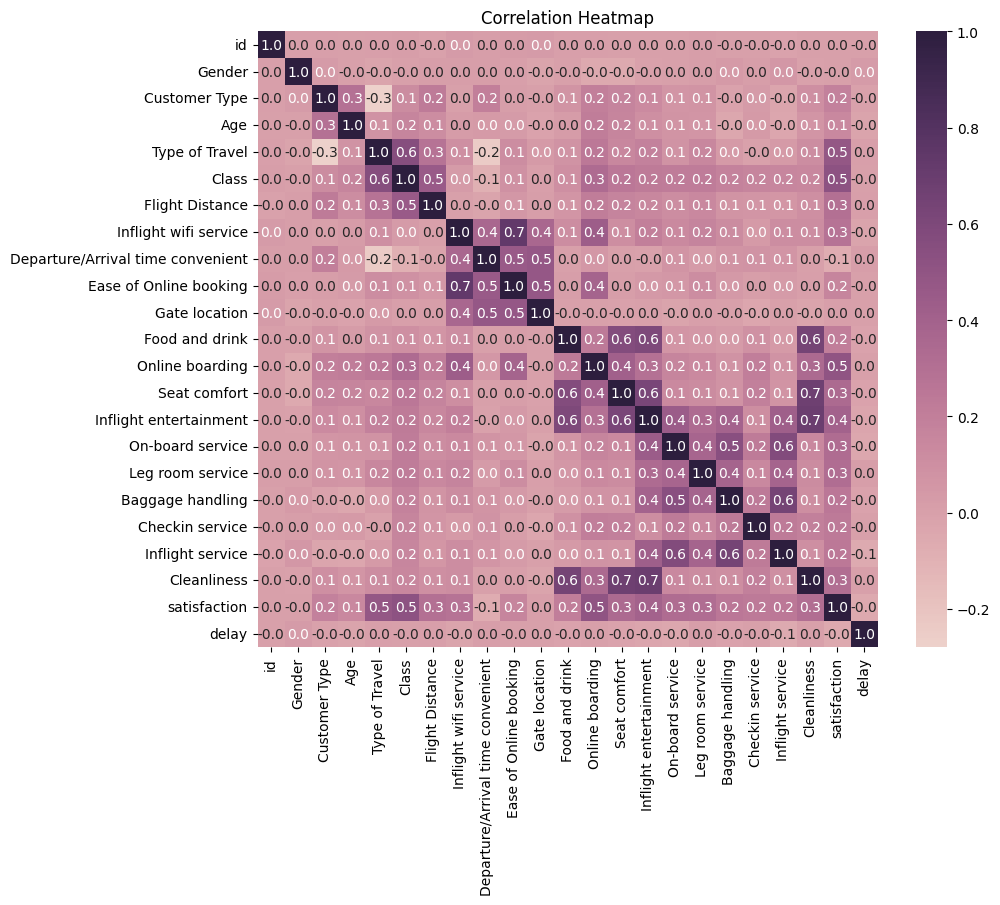

In [51]:
# Plotting the heatmap of cramers_v
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap=sns.cubehelix_palette(as_cmap=True), cbar = True, fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

It seems like there is multicollinearity in the dataset which might impact the quality of the model negatively, that is why I am going to calculate overall delay minutes by adding departure delay minutes and arrival delay minutes, losing multicollinearity from the dataset.(That was the conclusion from previous dataset)

Moreover from the correlation matrix we have , I can say that some columns of the dataset doesn't have correlation with satisfaction level of the customers of airline service. That is why I am going to remove the features which have less than 0.2 correlation with our target column.

In [85]:
#Features that has less than 0.2 correlation
df.corr()['satisfaction'][df.corr()['satisfaction'] < 0.2].index.to_list()

['id',
 'Gender',
 'Customer Type',
 'Age',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'delay']

In [86]:
#Features that has more than 0.2 correlation
df.corr()['satisfaction'][df.corr()['satisfaction'] > 0.2].index

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction'],
      dtype='object')

In [87]:
#Removing unnecessary columns from the dataset
ohe_left_cols = ['Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']
ohe_left_cols_test = ['Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']
ohe_df = ohe_df[ohe_left_cols]
ohe_df_test = ohe_df_test[ohe_left_cols_test]

cols_left = ['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']
cols_left_test = ['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
df = df[cols_left]
df_test = df_test[cols_left_test]

In [63]:
ohe_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction', 'delay', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

In [88]:
#Saving final datasets into csv format
df.to_csv(path_or_buf = './data/final_label_encoded_train.csv', sep = ',')
ohe_df.to_csv(path_or_buf = './data/final_ohe_hot_encoded_train.csv', sep = ',')
df_test.to_csv(path_or_buf = './data/final_label_encoded_test.csv', sep = ',')
ohe_df_test.to_csv(path_or_buf = './data/final_ohe_hot_encoded_test.csv', sep = ',')
print("Dataset without unessential features are preserved successfully!")

Dataset without unessential features are preserved successfully!


Here I will try to diminish the threshold value for selecting important features and keep the features that have more than 0.1 importance with our target column.

In [102]:
#Features that has less than 0.1 correlation
df.corr()['satisfaction'][df.corr()['satisfaction'] < 0.1].index.to_list()

['id', 'Gender', 'Departure/Arrival time convenient', 'Gate location', 'delay']

In [103]:
#Features that has more than 0.2 correlation
df.corr()['satisfaction'][df.corr()['satisfaction'] > 0.1].index

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Ease of Online booking', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [104]:
#Removing unnecessary columns from the dataset
ohe_left_cols = ['Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']
ohe_left_cols_test = ['Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']
ohe_df = ohe_df[ohe_left_cols]
ohe_df_test = ohe_df_test[ohe_left_cols_test]

cols_left = ['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']
cols_left_test = ['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
df = df[cols_left]
df_test = df_test[cols_left_test]

In [105]:
#Saving final datasets into csv format
df.to_csv(path_or_buf = './data/final2_label_encoded_train.csv', sep = ',')
ohe_df.to_csv(path_or_buf = './data/final2_ohe_hot_encoded_train.csv', sep = ',')
df_test.to_csv(path_or_buf = './data/final2_label_encoded_test.csv', sep = ',')
ohe_df_test.to_csv(path_or_buf = './data/final2_ohe_hot_encoded_test.csv', sep = ',')
print("Dataset without unessential features are preserved successfully!")

Dataset without unessential features are preserved successfully!
